# Преобразование Фурье

Рассмотреть сигнал  синусоидальной формы с частотой 120 Гц, Амплитудой 1 В. Отсчеты сигнала реализовать через каждую миллисекунду. Длина выборки 1000 отсчетов.  Получить Фурье-образ сигнала в зависимости от частоты отсчетов. Определить амплитуду Фурье-гармоники на частоте 120 Гц. Сравнить в амплитудой, которая была бы получена аналитическим путем.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.rcParams['font.serif'] = ['Hack']

Амплитуда по FFT: 0.9999999999999999
Аналитическая амплитуда: 1.0
Разность: 1.1102230246251565e-16


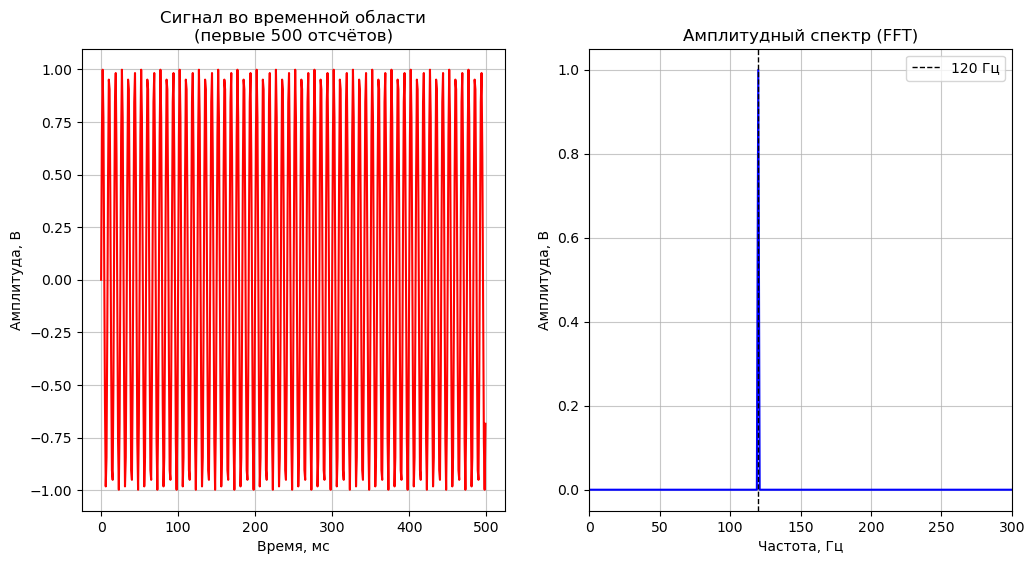

In [24]:
freq = 120 # Гц
ampl = 1.0 # В
dt = 0.001 # период дисректизации, с
N = 1000 # длина выборки 
nu = 1 / dt # частота дискретизации


t = np.arange(N) * dt
signal = ampl * np.sin(2 * np.pi * freq * t) # записали нашу синусоиду

# фурим и выделяем частоты
fft_signal = np.fft.fft(signal) 
fft_signal_freqs = np.fft.fftfreq(N, d=dt) 

# амплитудный спектр (модуль FFT, нормированный на N)
ampl_spectrum = np.abs(fft_signal) / N 

# находим индекс бина, соответствуюещго 120 Герцам
target_bin = np.argmin(np.abs(fft_signal_freqs - freq))
ampl_fft = ampl_spectrum[target_bin] * 2 

print(f"Амплитуда по FFT: {ampl_fft}")
print(f"Аналитическая амплитуда: {ampl}")
print(f"Разность: {abs((ampl_fft - ampl))}")

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
pos_freqs = fft_signal_freqs[:N//2]
pos_amp = ampl_spectrum[:N//2] * 2

ax[0].plot(t[:500] * 1000, signal[:500], color='red')
ax[0].set_title('Сигнал во временной области\n(первые 500 отсчётов)')
ax[0].set_xlabel('Время, мс')
ax[0].set_ylabel('Амплитуда, В')
ax[0].grid(True, alpha=0.7)

ax[1].plot(pos_freqs, pos_amp, color='blue')
ax[1].set_title('Амплитудный спектр (FFT)')
ax[1].set_xlabel('Частота, Гц')
ax[1].set_ylabel('Амплитуда, В')
ax[1].set_xlim(0, 300)
ax[1].axvline(freq, color='black', linestyle='--', linewidth=1, label=f'{freq} Гц')
ax[1].legend()
ax[1].grid(True, alpha=0.7)